In [9]:
import numpy as np
import matplotlib.pyplot as plt
from braket.circuits import Circuit
from braket.devices import LocalSimulator
from qbraid import device_wrapper, job_wrapper, get_jobs
from qbraid.visualization import plot_distribution

In [2]:
def h(qc,q0):
    qc.rz(q0,np.pi/2).v(q0).rz(q0,np.pi/2)

def cnot(qc,q0,q1):
    qc.rz(q0,-np.pi/2)
    qc.rz(q1,-np.pi).v(q1).rz(q1,-np.pi)
    qc.ecr(q0,q1)
    qc.x(q0)

def create_ghz(qubits):
    qc = Circuit()
    h(qc,qubits[0])
    cnot(qc,qubits[0],qubits[1])
    cnot(qc,qubits[1],qubits[2])
    return qc

In [3]:
test_circuit = create_ghz([7,6,5])

In [15]:
print(test_circuit)
print(test_circuit.to_ir('OPENQASM').source)

T  : |    0    |1|    2    |    3    | 4 |    5    | 6 |7|
                                                          
q5 : -Rz(-3.14)-V-Rz(-3.14)-------------------------ECR---
                                                    |     
q6 : -Rz(-3.14)-V-Rz(-3.14)-----------ECR-Rz(-1.57)-ECR-X-
                                      |                   
q7 : -Rz(1.57)--V-Rz(1.57)--Rz(-1.57)-ECR-X---------------

T  : |    0    |1|    2    |    3    | 4 |    5    | 6 |7|
OPENQASM 3.0;
bit[3] b;
qubit[8] q;
rz(1.5707963267948966) q[7];
v q[7];
rz(1.5707963267948966) q[7];
rz(-1.5707963267948966) q[7];
rz(-3.141592653589793) q[6];
v q[6];
rz(-3.141592653589793) q[6];
ecr q[7], q[6];
x q[7];
rz(-1.5707963267948966) q[6];
rz(-3.141592653589793) q[5];
v q[5];
rz(-3.141592653589793) q[5];
ecr q[6], q[5];
x q[6];
b[0] = measure q[5];
b[1] = measure q[6];
b[2] = measure q[7];


<h2>Simulation:</h2>

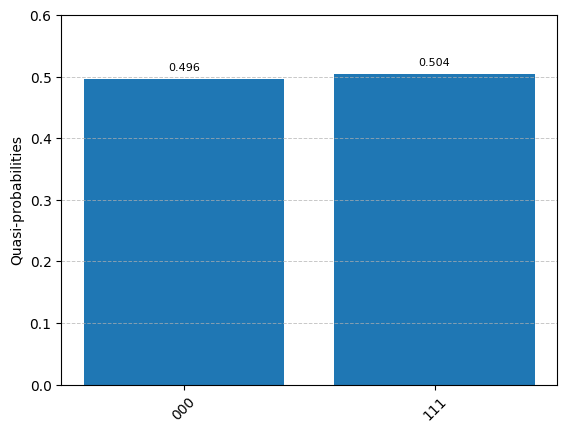

In [10]:
local_sim = LocalSimulator()
sim_result = local_sim.run(create_ghz([0,1,2]),shots=4096).result()
sim_counts = sim_result.measurement_counts
plot_distribution(sim_counts)

<h2>Running on OQC Lucy:</h2>

In [11]:
device_id = "aws_oqc_lucy"
device = device_wrapper(device_id)
print(device.metadata())

{'id': 'arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy', 'name': 'Lucy', 'provider': 'Oxford', 'vendor': 'AWS', 'numQubits': 8, 'deviceType': 'QPU', 'status': 'ONLINE', 'queueDepth': 1}


In [16]:
verbatim_qc = Circuit().add_verbatim_box(test_circuit)

In [17]:
job = device.run(verbatim_qc,shots=1024,disable_qubit_rewiring=True)

In [18]:
print(job.id)

aws_oqc_lucy-contactmainakroy-qjob-6ul5sfhlh80878mqljyf


In [19]:
result = job.result()._result

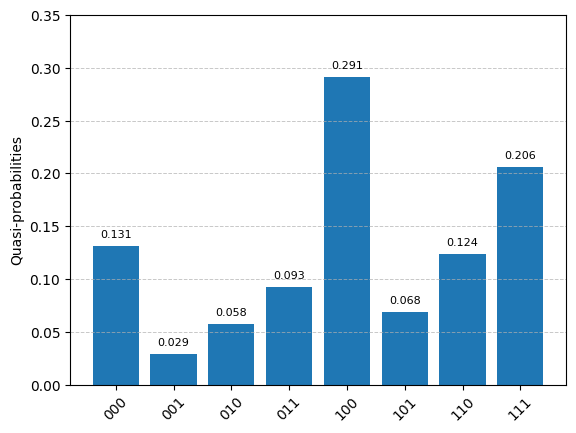

In [20]:
plot_distribution(result.measurement_probabilities)